# Домашнее задание 2

Используя датасет [STUDENT ALCOHOL CONSUMPTION](https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION#) и статью "USING	DATA	MINING	TO	PREDICT	SECONDARY SCHOOL	STUDENT	ALCOHOL	CONSUMPTION" выполните следующие задания:

### Предобработка (Max 2)
- Приведите описание признаков датасета на русском языке с указанием типа данных (0.3 балла)

- 1 school - из какой школы ученик (бинарный: "GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
- 2 sex - пол (бинарный: "F" - женский or "M" - мужской)
- 3 age - возраст (числовой: от 15 до 22)
- 4 address - место жительства (тип места жительства) (бинарный: "U" - городской or "R" - сельский)
- 5 famsize - размер семьи (бинарный: "LE3" - 3 или меньше человека ; "GT3" - строго больше 3-х человек)
- 6 Pstatus - семейное положение родителей (бинарный: "T" - живут вместе или "A" - живут раздельно)
- 7 Medu - образование матери (числовой: 0 - нет образования,  1 - начальная школа (4th grade), 2 – 5th to 9th средняя школа, 3 – полное среднее образование or 4 – высшее образование)
- 8 Fedu - образование отца (числовой: 0 - нет,  1 - начальная школа (4th grade), 2 – 5th to 9th средняя школа, 3 – полное среднее образование or 4 – высшее образование)
- 9 Mjob - работа матери (категориальный: "teacher", "health" связано с медицинскими услугами, гражданские "services" (например, в администрации или полиции), "at_home" или "other")
- 10 Fjob - работа отца (категориальный: "teacher", "health" связано с медицинскими услугами, гражданские "services" (например, в администрации или полиции), "at_home" или "other")
- 11 reason - причина выбора этой школы (категориальный: близко к дому "home", репутация школы "reputation", "course" предпочтительные курсы или "other")
- 12 guardian - опекун (категориальный: "mother", "father" или "other")
- 13 traveltime - время на дорогу до школы (числовой: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- 14 studytime - время, затрачиваемое на учебу (в неделю) (числовой: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- 15 failures - количество несданных предметов ранее (числовой: n if 1 ≤ n < 3,else 4)
- 16 schoolsup - доп образовательная поддержка (бинарный : yes or no)
- 17 famsup - семейная образовательная поддержка (бинарный : yes or no)
- 18 paid - дополнительный платные занятия по курсу (Math or Portuguese) (бинарный: yes or no)
- 19 activities - внеклассные занятия (бинарный: yes or no)
- 20 nursery - посещал детский сад (бинарный: yes or no)
- 21 higher - планирует получать высшее образование (бинарный: yes or no)
- 22 internet - доступ к интернету дома (бинарный: yes or no)
- 23 romantic - состоит в романтических отношениях (бинарный: yes or no)
- 24 famrel - качество отношений в семье (числовой: from 1 - очень плохо to 5 - отлично)
- 25 freetime - свободное время после школы (числовой: from 1 - очень мало to 5 - очень много)
- 26 goout - отдых с друзьями (числовой: from 1 - очень мало to 5 - очень много)
- 27 Dalc - употребление алкоголя по будням (числовой: from 1 - очень мало to 5 - очень много)
- 28 Walc - употребление алкоголя по выходным (числовой: from 1 - очень мало to 5 - очень много)
- 29 health - состояние здоровья на данный момент (числовой: from 1 - очень плохо to 5 - отлично)
- 30 absences - количество пропусков школы (числовой: от 0 до 93)

эти оценки связаны с курсом Математика или Португальсткий:

- 31 G1 - оценка за первый семестр (числовой: от 0 до 20)
- 31 G2 - оценка за второй семестр (числовой: от 0 до 20)
- 32 G3 - итоговая оценка (числовой: от 0 до 20, оценка получаемая на выходе) [целевая переменная]

In [33]:
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
%matplotlib inline

- Предобработка данных (1.7)

In [2]:
d_mat = pd.read_csv('student-mat.csv', sep=';')
d_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
d_por = pd.read_csv('student-por.csv', sep=';')
d_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


 - Проверьте наличие пропусков. В случае наличия пропусков заполните их медианными значениями (0.4)

In [34]:
d_mat = d_mat.dropna()
for column in d_mat.columns:
    null = len(d_mat[d_mat[column].isnull()])
    if null > 0:
        print (column, NULL)
    else:
        print ('Ok')

Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok
Ok


Пропусков в данных нет!

 - Преобразуйте все номинальные признаки в несколько признаков с бинарным значение (0.4)

Разделим признаки и целевую зависимость в две отдельные переменные X и y

In [20]:
y = d_mat['G3']
X = d_mat.drop('G3', axis=1)

датасет без категориальных признаков:

In [21]:
X_num = X.select_dtypes(exclude=['object'])
X_num.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10


датасет с категориальными признаками:

In [22]:
X_non_num = X.select_dtypes(include=['object'])
X_non_num.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


Преобразование категориальных в бинарные:

In [23]:
binom = pd.get_dummies(X_non_num)
binom.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


Объединим все в один датасет:

In [24]:
X_all = pd.concat([X_num, binom], axis=1)
X_all.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,17,1,1,1,2,0,5,3,3,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,15,1,1,1,2,3,4,3,2,2,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,15,4,2,1,3,0,3,2,2,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,16,3,3,1,2,0,4,3,2,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


- Подсчитайте количество людей, у которых матери с образованием "0" (0.4)

In [35]:
a=d_mat[d_mat['Medu'] == 0].shape[0]
print('Количество людей, у которых матери без образования', a)

('\xd0\x9a\xd0\xbe\xd0\xbb\xd0\xb8\xd1\x87\xd0\xb5\xd1\x81\xd1\x82\xd0\xb2\xd0\xbe \xd0\xbb\xd1\x8e\xd0\xb4\xd0\xb5\xd0\xb9, \xd1\x83 \xd0\xba\xd0\xbe\xd1\x82\xd0\xbe\xd1\x80\xd1\x8b\xd1\x85 \xd0\xbc\xd0\xb0\xd1\x82\xd0\xb5\xd1\x80\xd0\xb8 \xd0\xb1\xd0\xb5\xd0\xb7 \xd0\xbe\xd0\xb1\xd1\x80\xd0\xb0\xd0\xb7\xd0\xbe\xd0\xb2\xd0\xb0\xd0\xbd\xd0\xb8\xd1\x8f', 3)


- Используя объект [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) с параметром [f_regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)  выберите два признака, которые наиболее сильно связаны с признаком G3 (0.5)

In [43]:
selector = SelectKBest(f_regression, k = 2)
bestfeatures = pd.DataFrame(selector.fit_transform(X_all,y))
feature_1=X_all.columns.values[selector.get_support()][0]
feature_2=X_all.columns.values[selector.get_support()][1]
print(feature_1,feature_2)

('G1', 'G2')


Получаем, что предыдущие оценки наиболее сильно связаны с итоговой. Это мало что говорит нам о признаках, поэтому удалим G1 и G2 и посмотрим связь остальных признаков с итоговой оценкой. 

In [44]:
X_new = X_all.drop('G1', axis=1)
X_new = X_new.drop('G2', axis=1)
selector = SelectKBest(f_regression, k = 2)
bestfeatures = pd.DataFrame(selector.fit_transform(X_new,y))
feature_1=X_new.columns.values[selector.get_support()][0]
feature_2=X_new.columns.values[selector.get_support()][1]
print(feature_1,feature_2)

('Medu', 'failures')


### Регрессия (Max 4)
Выберите один признак, который наиболее влияет на признак G3 и используя кросс-валидацию (cross-validation) выполните следующее:

В предыдущем задании мы нашли, что признаки Medu и feilures сильнее всего связаны с итоговой оценкой. Чтобы понять, какой из этих двух признаков оказывается наиболее сильное влияние посмотрим, как признаки коррелируют с целевой переменной.

In [45]:
d_mat_new = d_mat.drop('G1', axis=1)
d_mat_new = d_mat_new.drop('G2', axis=1)
corr = d_mat_new.corr('pearson')['G3']
print('failures',corr['failures'])
print('Medu',corr['Medu'])

('failures', -0.36041494046165012)
('Medu', 0.21714749613860584)


Сильнее коррелирует fealures, значит его влияние на G3 сильнее. 

- На обучающей выборке обучите объект [RidgeСV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) для различных alpha (0.2)
- Выберите alpha при котором RidgeCV лучше всего предсказывает значения (0.1)
- Подсчитайте метрику mean absolute error, mean squared error, median absolute error,r2 score(0.2)
- Max (0.5)

In [53]:
from sklearn.linear_model import RidgeCV,LinearRegression, Lasso, Ridge,SGDRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold, train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,median_absolute_error, mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [54]:
kfold = KFold(X_num.shape[0], n_folds=5, shuffle=True, random_state=14)

На обучающей выборке обучите объект RidgeСV для различных alpha

In [ ]:
RrCV = RidgeCV(alphas=(0.1, 1.0, 10.0))
RrCV.fit(X_train, y_train)

Выберите alpha при котором RidgeCV лучше всего предсказывает значения

In [84]:
def rmse_alpha(r_class, alphas):
    cv_rmse = []
    for alpha in range (len(alphas)):
        r = r_class(alphas=alphas, store_cv_values = True)
        r.fit(X_train, y_train)
        cv_rmse.append(r.cv_values_[:,alpha].mean())
    print('alpha:', alphas[cv_rmse.index(np.min(cv_rmse))])

In [85]:
rmse_alpha(RidgeCV, np.arange(1, 10, 1))

('alpha:', 6)


Подсчитайте метрику mean absolute error, mean squared error, median absolute error,r2 score

In [86]:
alpha=np.arange(1, 100, 1)

ridge=RidgeCV(alphas=alpha).fit(X_train, y_train)
y_pred=ridge.predict(X_test)

print ('R2 score:',r2_score(y_test,y_pred)) 
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('MedAE:',median_absolute_error(y_test, y_pred))

('R2 score:', 0.16073735687078206)
('MAE:', 3.349626652902288)
('MSE:', 20.379787464546222)
('MedAE:', 2.9165518666482892)


- Создайте объекты [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor), используя все возможных варианты аргумента penalty (0.2)
- Обучите все полученных объекты на обучающей выборке (0.1)
- Подсчитайте метрику r2 score для всех объектов (0.2)
- Max (0.5)

Создайте объекты SGDRegressor, используя все возможных варианты аргумента penalty

In [93]:
SGDR_l2=SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, n_iter=5, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, warm_start=False, average=False)

In [94]:
SGDR_l1=SGDRegressor(loss='squared_loss', penalty='l1', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, n_iter=5, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, warm_start=False, average=False)


In [95]:
SGDR_none=SGDRegressor(loss='squared_loss', penalty='none', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, n_iter=5, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, warm_start=False, average=False)


In [96]:
SGDR_elast=SGDRegressor(loss='squared_loss', penalty='elasticnet', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, n_iter=5, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, warm_start=False, average=False)

Обучите все полученных объекты на обучающей выборке
Подсчитайте метрику r2 score для всех объектов

In [97]:
y_pred=SGDR_l2.fit(X_train, y_train).predict(X_test)
print ('R2 penalty=l2 :',r2_score(y_test,y_pred))

('R2 penalty=l2 :', 0.074453325068680409)


In [98]:
y_pred=SGDR_l1.fit(X_train, y_train).predict(X_test)
print ('R2 penalty=l1 :',r2_score(y_test,y_pred))

('R2 penalty=l1 :', 0.069982432998470623)


In [99]:
y_pred=SGDR_none.fit(X_train, y_train).predict(X_test)
print ('R2 penalty=none :',r2_score(y_test,y_pred))

('R2 penalty=none :', 0.07553256306623779)


In [100]:
y_pred=SGDR_elast.fit(X_train, y_train).predict(X_test)
print ('R2 penalty=elasticnet :',r2_score(y_test,y_pred))

('R2 penalty=elasticnet :', 0.075167542062519743)


При 'elasticnet самое большое значение R2

- Создайте объекты с параметрами max_depth = 1,3, 10 [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) и для каждого объекта изменяйте количество n_estimators  от 100 до 1000 с шагом 100 (0.2)
- Подсчитайте метрику r2 score для всех объектов (0.1)
- Визуализируйте зависимость R2 oт n_estimators на графике (0.2)
- Max (0.5)

Создайте объекты с параметрами max_depth = 1,3, 10 GradientBoostingRegressor и для каждого объекта изменяйте количество n_estimators от 100 до 1000 с шагом 100

In [101]:
GradientBoostingRegressor(max_depth = 1, n_estimators= np.arange(100,1000,100))

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=1, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0,
             n_estimators=array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

Подсчитайте метрику r2 score для всех объектов

In [115]:
def r2_depth(depth):
    n_estimators= np.arange(100,1000,100)
    r2_scores=[]
    for i in n_estimators:
        GB=GradientBoostingRegressor(max_depth = depth, n_estimators=i)
        y_pred=GB.fit(X_train,y_train).predict(X_test)
        print('for n_estimators=',i,'r2 =',r2_score(y_test,y_pred))
        r2_scores.append(r2_score(y_test, y_pred)) 
    plt.plot(np.arange(100,1000,100), r2_scores)

('for n_estimators=', 100, 'r2 =', 0.14263879355227571)
('for n_estimators=', 200, 'r2 =', 0.14266243541507018)
('for n_estimators=', 300, 'r2 =', 0.14266244728108946)
('for n_estimators=', 400, 'r2 =', 0.1426624472876683)
('for n_estimators=', 500, 'r2 =', 0.14266244728767152)
('for n_estimators=', 600, 'r2 =', 0.14266244728767152)
('for n_estimators=', 700, 'r2 =', 0.14266244728767152)
('for n_estimators=', 800, 'r2 =', 0.14266244728767152)
('for n_estimators=', 900, 'r2 =', 0.14266244728767152)


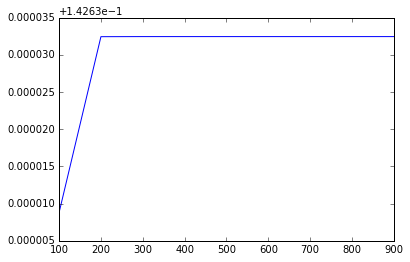

In [116]:
r2_depth(1)

In [118]:
GradientBoostingRegressor(max_depth = 3, n_estimators= np.arange(100,1000,100))

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0,
             n_estimators=array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

('for n_estimators=', 100, 'r2 =', 0.14266165332592962)
('for n_estimators=', 200, 'r2 =', 0.14266244726658484)
('for n_estimators=', 300, 'r2 =', 0.14266244728767108)
('for n_estimators=', 400, 'r2 =', 0.14266244728767163)
('for n_estimators=', 500, 'r2 =', 0.14266244728767163)
('for n_estimators=', 600, 'r2 =', 0.14266244728767163)
('for n_estimators=', 700, 'r2 =', 0.14266244728767163)
('for n_estimators=', 800, 'r2 =', 0.14266244728767163)
('for n_estimators=', 900, 'r2 =', 0.14266244728767163)


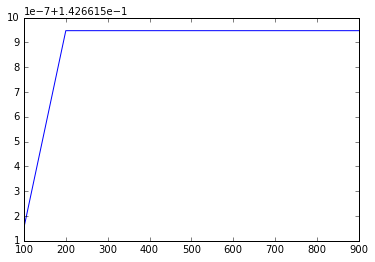

In [119]:
r2_depth(3)

In [122]:
GradientBoostingRegressor(max_depth = 10, n_estimators= np.arange(100,1000,100))

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=10, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0,
             n_estimators=array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

('for n_estimators=', 100, 'r2 =', 0.14266165332592962)
('for n_estimators=', 200, 'r2 =', 0.14266244726658484)
('for n_estimators=', 300, 'r2 =', 0.14266244728767108)
('for n_estimators=', 400, 'r2 =', 0.14266244728767163)
('for n_estimators=', 500, 'r2 =', 0.14266244728767163)
('for n_estimators=', 600, 'r2 =', 0.14266244728767163)
('for n_estimators=', 700, 'r2 =', 0.14266244728767163)
('for n_estimators=', 800, 'r2 =', 0.14266244728767163)
('for n_estimators=', 900, 'r2 =', 0.14266244728767163)


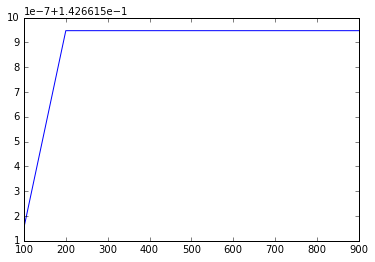

In [124]:
r2_depth(10)

- Используя все доступные регрессоры в библиотеке sklearn, найдите самый лучший регрессор. (2.5)

In [125]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [135]:
kneibors= KNeighborsRegressor()
rand_forest = RandomForestRegressor(max_depth=2, random_state=1234)
lin_regr = LinearRegression()
dec_tree = DecisionTreeRegressor(max_depth=2)
ridge = Ridge(alpha=0.2)
lasso= Lasso(alpha=0.2)
GRB=GradientBoostingRegressor(max_depth = 10, n_estimators=100)
R_CV = RidgeCV(alphas=np.arange(1,100,1))
SGDR=SGDRegressor( penalty='elasticnet')

Будем оценивать качество регрессора с помощью метрики R2:

In [136]:
def test_reg(r):
    r.fit(X_train, y_train)
    y_pred=r.predict(X_test)
    return ( r2_score(y_test,y_pred))

In [137]:
print('R2 KNeighbors',test_reg(kneibors))

('R2 KNeighbors', 0.062863477400197598)


In [138]:
print('R2 RandomForest',test_reg(rand_forest))

('R2 RandomForest', 0.14422985735094662)


In [139]:
print('R2 LinearR',test_reg(lin_regr))

('R2 LinearR', 0.16326588714918044)


In [140]:
print('R2 DecisionTree',test_reg(dec_tree))

('R2 DecisionTree', 0.12970125340278882)


In [141]:
print('R2 Ridge',test_reg(ridge))

('R2 Ridge', 0.1631820044825194)


In [142]:
print('R2 Lasso',test_reg(lasso))

('R2 Lasso', 0.14776523609269321)


In [143]:
print('R2 GradientBoosting',test_reg(GRB))

('R2 GradientBoosting', 0.14266165332592962)


In [144]:
print('R2 RidgeCV',test_reg(R_CV))

('R2 RidgeCV', 0.16073735687078206)


In [145]:
print('R2 SGDR',test_reg(SGDR))

('R2 SGDR', 0.075220632394996434)


### Классификация (Max 4)
- В статье описано использование Random Forest для предсказания важности факторов, влияющих на потребление алкоголя. Повторите эксперимент с использование объекта [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) и найдите наилучшие параметры. Укажите accuracy для наилучших параметров (0.5)

In [222]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import Binarizer

In [223]:
data = pd.concat([d_mat.G3, X_new], axis=1)
data.head()

,G3,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,6,18,4,4,2,2,0,4,3,4,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,6,17,1,1,1,2,0,5,3,3,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,10,15,1,1,1,2,3,4,3,2,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,15,15,4,2,1,3,0,3,2,2,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,10,16,3,3,1,2,0,4,3,2,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


Аналогично статье:

In [224]:
data['Alco']=(data['Dalc']*5/7)+(data['Walc']*2/7)

In [225]:
data['Alco'].head()

0    1.000000
1    1.000000
2    2.285714
3    1.000000
4    1.285714
Name: Alco, dtype: float64

In [231]:
from sklearn.preprocessing import Binarizer
data['Alco']= Binarizer(threshold = 2.9999).fit_transform(data['Alco'].reshape(-1,1))

In [232]:
X3 = data.drop(['Alco','Dalc','Walc'],axis = 1)
y3 = data['Alco']
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=12)

In [233]:
RandomForestClassifier(n_estimators=10, max_depth=None)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [251]:
def estim(classif,n_est):
    accuracy = []
    for i in (n_est):
        RFC=classif(n_estimators=i, max_depth=10)
        y_pred= RFC.fit(X_train, y_train).predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
    print('Optimal number of estimators',accuracy.index(np.max(accuracy)),'Accuracy=',np.max(accuracy))

In [252]:
estim(RandomForestClassifier,np.arange(1,100,1))

('Optimal number of estimators', 22, 'Accuracy=', 0.92405063291139244)


In [253]:
def dep(classif, m_dep):
    accuracy = []
    for i in (m_dep):
        RFC=classif(n_estimators=10, max_depth=i)
        y_pred= RFC.fit(X_train, y_train).predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
    print('Optimal depth',accuracy.index(np.max(accuracy)),'Accuracy=',np.max(accuracy))

In [254]:
dep(RandomForestClassifier, np.arange(1,100,1))

('Optimal depth', 33, 'Accuracy=', 0.92405063291139244)


Далее будем искать оптимальные параметры с помощью GridSearchCV

In [255]:
def gridS(n_est,max_dep):
    param_grid=dict(n_estimators=n_est,max_depth=max_dep)
    cv=StratifiedShuffleSplit(y3,n_iter=5,test_size=0.4,random_state=14)
    grid=GridSearchCV(RandomForestClassifier(),param_grid=param_grid,cv=cv)
    grid.fit(X3,y3)
    print(grid.best_params_,grid.best_score_)

In [256]:
gridS(np.arange(10,100,5),np.arange(10,100,5))

({'n_estimators': 35, 'max_depth': 25}, 0.89620253164556962)


- Обучите объект [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)  и найдите для него наилучшие параметры. Укажите accuracy для наилучших параметров (0.5)

In [257]:
GradientBoostingClassifier(n_estimators=10, max_depth=5).fit(X_train,y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=5, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [258]:
def gridS1(n_est,max_dep):
    param_grid=dict(n_estimators=n_est,max_depth=max_dep)
    cv=StratifiedShuffleSplit(y3,n_iter=5,test_size=0.4,random_state=1234)
    grid=GridSearchCV(GradientBoostingClassifier(),param_grid=param_grid,cv=cv)
    grid.fit(X3,y3)
    print(grid.best_params_,grid.best_score_)

In [259]:
gridS1(np.arange(10,100,5),np.arange(10,100,5))

({'n_estimators': 60, 'max_depth': 65}, 0.89620253164556962)


- Обучите объект [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)  и найдите для него наилучшие параметры. Укажите accuracy для наилучших параметров (0.5)

Так как GridSearchCV с таким объемом данных работате очень долго, будем оптимизировать как в начале ( по каждому параметру отдельно)

In [263]:
ABC=AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0)
ABC.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [264]:
def estimators(classif,n_est):
    accuracy = []
    for i in (n_est):
        RFC=classif(n_estimators=i, max_depth=20)
        y_pred= RFC.fit(X_train, y_train).predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
    print('Optimal number of estimators',accuracy.index(np.max(accuracy)),'Accuracy=',np.max(accuracy))

In [265]:
estimators(GradientBoostingClassifier,np.arange(10,100,1))

('Optimal number of estimators', 4, 'Accuracy=', 0.87341772151898733)


In [266]:
def depth(classif, m_dep):
    accuracy = []
    for i in (m_dep):
        RFC=classif(n_estimators=6, max_depth=i)
        y_pred= RFC.fit(X_train, y_train).predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
    print('Optimal depth',accuracy.index(np.max(accuracy)),'Accuracy=',np.max(accuracy))

In [267]:
depth(GradientBoostingClassifier, np.arange(1,100,1))

('\xd0\x9eptimal depth', 2, 'Accuracy=', 0.91139240506329111)


In [270]:
def learning_rate(classif,learn_r):
    accuracy = []
    for i in (learn_r):
        RFC=classif(n_estimators=14,learning_rate=i)
        y_pred= RFC.fit(X_train, y_train).predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
    print('Optimal learninig_rate:',accuracy.index(np.max(accuracy)),'Accuracy=',np.max(accuracy))

In [271]:
learning_rate(AdaBoostClassifier,np.arange(1,100,1))

('Optimal learninig_rate:', 0, 'Accuracy=', 0.91139240506329111)


- Найдите наилучший классификатор. Укажите accuracy для наилучших параметров (2.5)

In [281]:
def accuracy_on_n_est(classif,n_est):
    accuracy = []
    for i in (n_est):
        RFC=classif(n_estimators=i)
        y_pred= RFC.fit(X_train, y_train).predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
    plt.plot(np.arange(1,100,1),accuracy,label=classif)
    print(classif,'Optimal number of estimators',accuracy.index(np.max(accuracy)),'Accuracy=',np.max(accuracy))

(<class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'Optimal number of estimators', 14, 'Accuracy=', 0.92405063291139244)
(<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'Optimal number of estimators', 4, 'Accuracy=', 0.91139240506329111)
(<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'Optimal number of estimators', 21, 'Accuracy=', 0.92405063291139244)


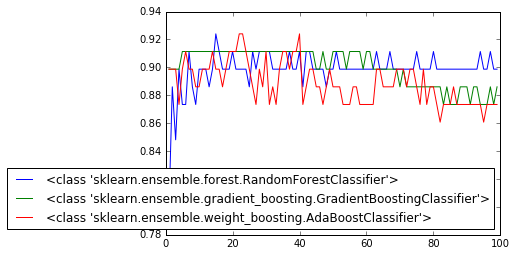

In [282]:
accuracy_on_n_est(RandomForestClassifier,np.arange(1,100,1))
accuracy_on_n_est(GradientBoostingClassifier,np.arange(1,100,1))
accuracy_on_n_est(AdaBoostClassifier,np.arange(1,100,1))
plt.legend(loc = 'lower right') 

In [283]:
def accuracy_on_max_dep(classif, m_dep,opt_estim):
    accuracy = []
    for i in (m_dep):
        RFC=classif(n_estimators=opt_estim, max_depth=i)
        y_pred= RFC.fit(X_train, y_train).predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
    plt.plot(np.arange(1,100,1),accuracy,label=classif)
    print(classif, 'Optimal max depth',accuracy.index(np.max(accuracy)),'Accuracy=',np.max(accuracy))

(<class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'Optimal max depth', 4, 'Accuracy=', 0.91139240506329111)
(<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'Optimal max depth', 0, 'Accuracy=', 0.89873417721518989)


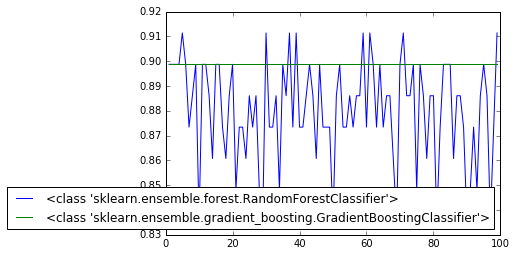

In [285]:
accuracy_on_max_dep(RandomForestClassifier,np.arange(1,100,1),5)
accuracy_on_max_dep(GradientBoostingClassifier,np.arange(1,100,1),4) 
plt.legend(loc = 'lower right')

In [286]:
def accuracy_on_learn_rate(classif,learn_r,n_est):
    accuracy = []
    for i in (learn_r):
        RFC=classif(n_estimators=n_est,learning_rate=i)
        y_pred= RFC.fit(X_train, y_train).predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
    plt.plot(np.arange(1,100,1),accuracy,label=classif)
    print('Оптимальное learn_rate:',accuracy.index(np.max(accuracy)),'Accuracy=',np.max(accuracy)) 

('\xd0\x9e\xd0\xbf\xd1\x82\xd0\xb8\xd0\xbc\xd0\xb0\xd0\xbb\xd1\x8c\xd0\xbd\xd0\xbe\xd0\xb5 learn_rate:', 0, 'Accuracy=', 0.82278481012658233)
('\xd0\x9e\xd0\xbf\xd1\x82\xd0\xb8\xd0\xbc\xd0\xb0\xd0\xbb\xd1\x8c\xd0\xbd\xd0\xbe\xd0\xb5 learn_rate:', 0, 'Accuracy=', 0.91139240506329111)


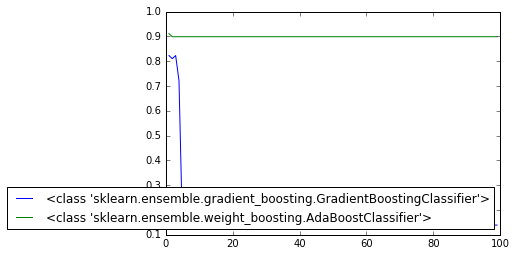

In [288]:
accuracy_on_learn_rate(GradientBoostingClassifier,np.arange(1,100,1),5)  
accuracy_on_learn_rate(AdaBoostClassifier,np.arange(1,100,1),21)
plt.legend(loc = 'lower right')  

По значениям Accuracy для различных переменных можно сказать, что хорошими являются классификаторы RandomForest и AdaBoost

In [221]:
!pip install -U scipy

    100% |████████████████████████████████| 21.8MB 30kB/s 
    100% |████████████████████████████████| 3.9MB 146kB/s 
  Found existing installation: numpy 1.10.4
    DEPRECATION: Uninstalling a distutils installed project (numpy) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    Uninstalling numpy-1.10.4:
      Successfully uninstalled numpy-1.10.4
  Found existing installation: scipy 0.17.0
    DEPRECATION: Uninstalling a distutils installed project (scipy) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    Uninstalling scipy-0.17.0:
      Successfully uninstalled scipy-0.17.0
You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Замечания

- В работе следует использовать библиотеку scikit-learn версии 0.18 и scipy версии 0.18.1